Nota:


Forma de pensar análise ->
1. Analisar o dataset (estrutura) ->
2. Análise Univariada (qual distribuição, ) ->
3. Bivariada (Media de idade em cada departamento... cruzar variáveis)
4. Multivariada - Machine Learning




# 0.Introdução


A análise abaixo foi feita utilizando dados sobre o engajamento observado pela empresa Netflix em sua plataforma, no período de janeiro a junho de 2023.

Pretende-se visualizar melhor os títulos de maior engajamento, que por sua vez proporcionaram maior sucesso, comparar com os titulos que receberam menor atenção. Observar padrões, a disperção da atenção do publico entre os conteúdos.

---

Questões que iremos explorar:
- Quais são os títulos mais consumidos do período
- Como se da a disperção entre os títulos, qual o nível de concentração de sucesso entre os títulos mais assitidos. <br>(aplicaria-se a regra 80/20?)
- Que padrões evidenciam-se entre os títulos mais bem sucedidos em comparação aos demais.
- Que pode se observar entre os títulos de pior desempenho?

---

Fonte do dataset: https://www.kaggle.com/datasets/pluspin/netflix-engagement-report-2023jan-jun

## Sobre o Dataset
Este conjunto de dados abrange mais de 18.000 títulos , representando 99% de toda a visualização no Netflix <br> e quase 100 bilhões de horas visualizadas. Arredondado para 100.000 horas visualizadas.
<br>
<br>


## Variáveis Disponíveis:

> ### Title
O nome de cada Conteúdo
> ***


> ### Available Globally
Se o título está diponivel globalmente ou não.
> ***


> ### Release Date
Data de lançamento
> ***


> ### Hours Viewed
Total de horas assistidas
> ***

## Carregando Bibliotecas e DataFrame

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [337]:
df = pd.read_csv("https://raw.githubusercontent.com/tonheverton/Analise_Exploratoria/main/Netflix_Engagement_Report_2023_Jan-Jun_cleaned.csv")

In [338]:
df.head()

,Title,Available Globally,Release Date,Hours Viewed
0,The Night Agent: Season 1,Yes,3/23/2023,812100000
1,Ginny & Georgia: Season 2,Yes,1/5/2023,665100000
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,12/30/2022,622800000
3,Wednesday: Season 1,Yes,11/23/2022,507700000
4,Queen Charlotte: A Bridgerton Story,Yes,5/4/2023,503000000


# 1. Analisando DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18214 entries, 0 to 18213
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               18214 non-null  object
 1   Available Globally  18214 non-null  object
 2   Release Date        4855 non-null   object
 3   Hours Viewed        18214 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 569.3+ KB


In [19]:
df[df["Release Date"].isnull()]

,Title,Available Globally,Release Date,Hours Viewed
34,"Pablo Escobar, el patrón del mal: Season 1",Yes,NaN,170100000
37,Chiquititas (2013),No,NaN,162000000
42,New Amsterdam (2018): Season 1,No,NaN,153000000
44,Mr. Queen // 철인왕후,No,NaN,151500000
47,PAW Patrol: Season 6,No,NaN,149300000
...,...,...,...,...
18209,راس السنة,No,NaN,100000
18210,心が叫びたがってるんだ。,No,NaN,100000
18211,두근두근 내 인생,No,NaN,100000
18212,라디오 스타,No,NaN,100000


Analise indiviudal, com graficos e expecificações em cada variável conforme suas curiosidades. Separar entre Numéricas e Categóricas. realizar comentários .

# Analisando Variáveis:

In [403]:
 df_titulos_orientais = df.sort_values(by='Title').tail(44)

 print(f"\033[1mTitle\033[0m", f"- Existem {len(df_titulos_orientais)} títulos, cerca de {len(df_titulos_orientais) / len(df['Title']) * 100:,.2f}%, "
 "em idiomas orientais, dificultando um pouco a compreensão ocidental. \nIremos manter os títulos. ")

Title - Existem 44 títulos, cerca de 0.24%, em idiomas orientais, dificultando um pouco a compreensão ocidental. 
Iremos manter os títulos. 


In [213]:
not_globally, globaly = (df["Available Globally"].value_counts(1)*100).round(2).map("{:.2f}%".format)
print(f"\033[1mAvailable Globally\033[0m","- Particularmente, imaginava que a maioria dos títulos fossem disponíveis globalmente,",
f" \nporém {not_globally} dos títulos não estão globalmente disponíveis, enquanto penas {globaly} não possuem restrições. ")

Available Globally - Particularmente, imaginava que a maioria dos títulos fossem disponíveis globalmente,  
porém 75.22% dos títulos não estão globalmente disponíveis, enquanto penas 24.78% não possuem restrições. 


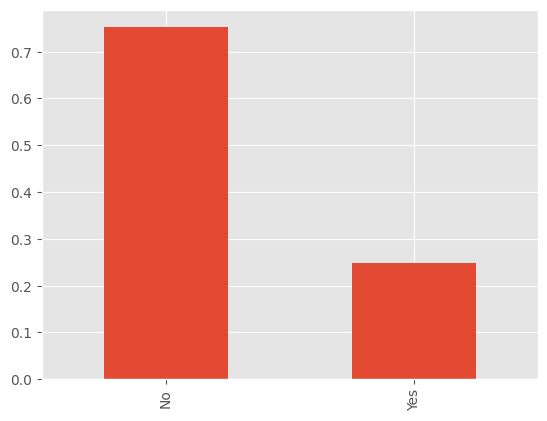

In [411]:
_ = df["Available Globally"].value_counts(1).plot(kind="bar")

In [310]:
sem_data, com_data = df["Release Date"].notnull().value_counts()
print("\033[1mRelease Date\033[0m", f"- {sem_data/len(df['Title'])*100:,.2f}% dos titulos não possuem data de lançamento, "
f"enquanto apenas {com_data/len(df['Title'])*100:,.2f}% têm.")

Release Date - 73.34% dos titulos não possuem data de lançamento, enquanto apenas 26.66% têm.


In [405]:
df["%"] = ( df["Hours Viewed"] / df["Hours Viewed"].sum() ) *100
representatividade_dos_80_porcento_menos_consumidos = df["%"].nsmallest(df.shape[0] - (int(df.shape[0] * 0.2))).sum()
representatividade_dos_20_porcento_mais_consumidos = df["%"].nlargest(int(df.shape[0] * 0.2)).sum()
representatividade_dos_5_porcento_mais_consumidos = df["%"].nlargest(int(df.shape[0] * 0.05)).sum()

print("\033[1m Hours Viewed\033[0m", f"- 20% dos titulos representam {representatividade_dos_20_porcento_mais_consumidos:,.2f}% do consumo"
f" enquanto, todo o restante dos 80%, \n representam apenas {representatividade_dos_80_porcento_menos_consumidos:,.2f}%, isso é realmente impressionante. "
"Ainda mais imaginando o custo de \n produção de cada conteúdo. Em outras palavras dos 18.000 títulos apenas 3.000 são responsáveis \n por 80% do consumo total."
" Apenas 5% de todo o conteúdo disponível representa mais de 50% do consumo.")

 Hours Viewed - 20% dos titulos representam 85.62% do consumo enquanto, todo o restante dos 80%, 
 representam apenas 14.38%, isso é realmente impressionante. Ainda mais imaginando o custo de 
 produção de cada conteúdo. Em outras palavras dos 18.000 títulos apenas 3.000 são responsáveis 
 por 80% do consumo total. Apenas 5% de todo o conteúdo disponível representa mais de 50% do consumo.


# Testes

In [ ]:
# Os mais flopados, a lista.

df.nsmallest(n = 10, columns="Hours Viewed")

In [ ]:
# Os mais flopados, pelo mundo todo.


df[df["Available Globally"] == "Yes"].nsmallest(50, columns="Hours Viewed")

In [ ]:
# Os mais flopados, acima do mínimo

df[df["Hours Viewed"] > 100000].nsmallest(10, columns="Hours Viewed")

In [170]:
df_lancamentos = df[df["Release Date"].notnull()]
df_lancamentos

,Title,Available Globally,Release Date,Hours Viewed,Dia,Mês,Ano
0,The Night Agent: Season 1,Yes,3/23/2023,812100000,23,3,2023
1,Ginny & Georgia: Season 2,Yes,1/5/2023,665100000,5,1,2023
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,12/30/2022,622800000,30,12,2022
3,Wednesday: Season 1,Yes,11/23/2022,507700000,23,11,2022
4,Queen Charlotte: A Bridgerton Story,Yes,5/4/2023,503000000,4,5,2023
...,...,...,...,...,...,...,...
18104,"Whose Vote Counts, Explained: Limited Series",Yes,9/28/2020,100000,28,9,2020
18164,"Yours Sincerely, Kanan Gill",Yes,4/24/2020,100000,24,4,2020
18177,Zion,Yes,8/10/2018,100000,10,8,2018
18179,Zoe,No,7/20/2018,100000,20,7,2018


In [191]:
df_ultimate = df_lancamentos['Release Date'].value_counts()

In [196]:
df_ultimate = pd.DataFrame(df_ultimate)
df_ultimate.reset_index()

,index,Release Date
0,9//2022,100
1,12//2022,98
2,10//2022,96
3,11//2022,89
4,10//2021,87
...,...,...
119,9//2013,1
120,8//2013,1
121,9//2011,1
122,2//2014,1


<Axes: >

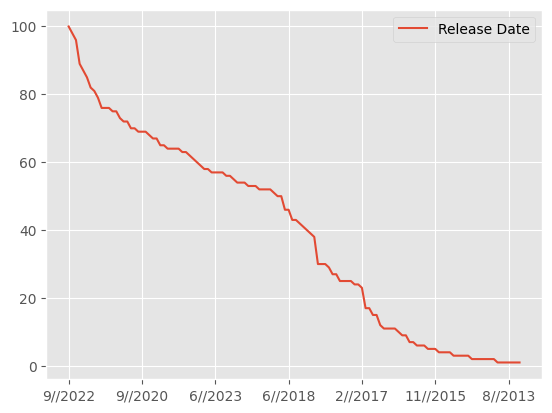

In [194]:
df_ultimate.plot()

In [187]:
df_lancamentos['Release Date'] = df_lancamentos['Release Date'].str.replace(r'(?<=/).*?(?=/)', '')
df_lancamentos

<ipython-input-187-a0e36ce7aacb>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_lancamentos['Release Date'] = df_lancamentos['Release Date'].str.replace(r'(?<=/).*?(?=/)', '')
<ipython-input-187-a0e36ce7aacb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lancamentos['Release Date'] = df_lancamentos['Release Date'].str.replace(r'(?<=/).*?(?=/)', '')


,Title,Available Globally,Release Date,Hours Viewed,Dia,Mês,Ano,Data
0,The Night Agent: Season 1,Yes,3//2023,812100000,23,3,2023,3/23/2023
1,Ginny & Georgia: Season 2,Yes,1//2023,665100000,5,1,2023,1/5/2023
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,12//2022,622800000,30,12,2022,12/30/2022
3,Wednesday: Season 1,Yes,11//2022,507700000,23,11,2022,11/23/2022
4,Queen Charlotte: A Bridgerton Story,Yes,5//2023,503000000,4,5,2023,5/4/2023
...,...,...,...,...,...,...,...,...
18104,"Whose Vote Counts, Explained: Limited Series",Yes,9//2020,100000,28,9,2020,9/28/2020
18164,"Yours Sincerely, Kanan Gill",Yes,4//2020,100000,24,4,2020,4/24/2020
18177,Zion,Yes,8//2018,100000,10,8,2018,8/10/2018
18179,Zoe,No,7//2018,100000,20,7,2018,7/20/2018


In [198]:
_ = plt.bar(x = df_ultimate["index"], height=df_ultimate["Release Date"])

KeyError: ignored

In [120]:
df[['Mês', 'Dia', 'Ano']] = df['Release Date'].str.split('/', expand=True)

In [97]:
df[df["Release Date"].notnull()]

,Title,Available Globally,Release Date,Hours Viewed,Dia,Mês,Ano
0,The Night Agent: Season 1,Yes,3/23/2023,812100000,23,3,2023
1,Ginny & Georgia: Season 2,Yes,1/5/2023,665100000,5,1,2023
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,12/30/2022,622800000,30,12,2022
3,Wednesday: Season 1,Yes,11/23/2022,507700000,23,11,2022
4,Queen Charlotte: A Bridgerton Story,Yes,5/4/2023,503000000,4,5,2023
...,...,...,...,...,...,...,...
18104,"Whose Vote Counts, Explained: Limited Series",Yes,9/28/2020,100000,28,9,2020
18164,"Yours Sincerely, Kanan Gill",Yes,4/24/2020,100000,24,4,2020
18177,Zion,Yes,8/10/2018,100000,10,8,2018
18179,Zoe,No,7/20/2018,100000,20,7,2018


In [154]:
meses_de_lançamento = df["Mês"].value_counts(sort=False)
pd.DataFrame(meses_de_lançamento)
meses_de_lançamento = meses_de_lançamento.reset_index()
meses_de_lançamento

,index,Mês
0,3,419
1,1,363
2,12,465
3,11,429
4,5,382
5,2,350
6,4,401
7,6,413
8,7,363
9,10,469


In [ ]:
plt.style.use('ggplot')

In [161]:
meses_de_lançamento["index"] = meses_de_lançamento["index"].astype(int)

In [162]:
meses_de_lançamento.sort_values(by="index")

,index,Mês
1,1,363
5,2,350
0,3,419
6,4,401
4,5,382
7,6,413
8,7,363
11,8,385
10,9,416
9,10,469


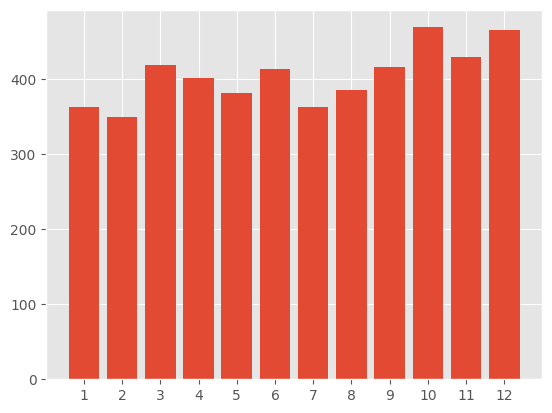

In [167]:
_ = plt.bar(x = meses_de_lançamento["index"], height=meses_de_lançamento["Mês"])
_ = plt.xticks(meses_de_lançamento["index"])
#ax.sns_title("Relação dos lançamentos por mes")



In [169]:
print(f" Pode-se observar grande harmonia entre a quantidade de lançamentos por mês, com um desvio padrão de {meses_de_lançamento.Mês.std()}, com uma sutil ")

38.31557559705104

Podemos observar grande harmonia

In [ ]:
plt.hist(x=df["Title"], height=df["Hours Viewed"])

In [230]:
dist_hour = pd.value_counts(
    pd.cut(
        x=df["Hours Viewed"],
        bins = 17,
        include_lowest=True
    )
)
dist_hour

(-712000.001, 47864705.882]       17894
(47864705.882, 95629411.765]        221
(95629411.765, 143394117.647]        48
(143394117.647, 191158823.529]       25
(191158823.529, 238923529.412]       12
(238923529.412, 286688235.294]        5
(621041176.471, 668805882.353]        2
(477747058.824, 525511764.706]        2
(382217647.059, 429982352.941]        2
(429982352.941, 477747058.824]        1
(286688235.294, 334452941.176]        1
(764335294.118, 812100000.0]          1
(334452941.176, 382217647.059]        0
(525511764.706, 573276470.588]        0
(573276470.588, 621041176.471]        0
(668805882.353, 716570588.235]        0
(716570588.235, 764335294.118]        0
Name: Hours Viewed, dtype: int64

<Axes: >

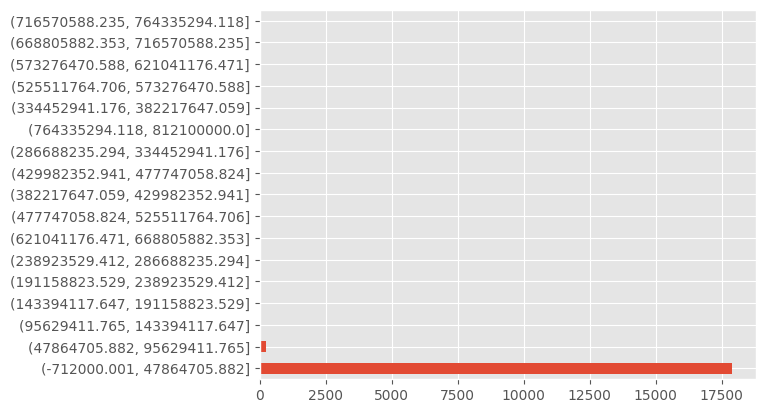

In [225]:
dist_hour.plot(kind='barh')

Vou criar uma nova coluna para avaliar a representatividade de cada titulo diante do consumo como um todo.

<Axes: >

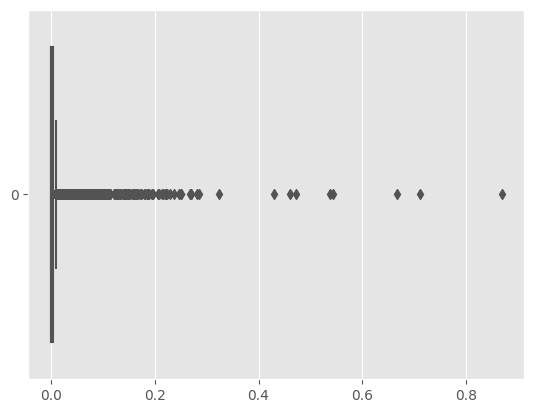

In [275]:
sns.boxplot(df["%"], orient="h")

In [277]:
df.shape[0] * 0.2

3642.8

In [268]:
df["%"].describe()

count    18214.000000
mean         0.005490
std          0.020028
min          0.000107
25%          0.000214
50%          0.000749
75%          0.003638
max          0.868973
Name: %, dtype: float64

In [240]:
dist_hour = pd.value_counts(
    pd.cut(
        x=df["%"],
        bins = 17,
        include_lowest=True
    )
)
dist_hour

(-712000.001, 47864705.882]       17894
(47864705.882, 95629411.765]        221
(95629411.765, 143394117.647]        48
(143394117.647, 191158823.529]       25
(191158823.529, 238923529.412]       12
(238923529.412, 286688235.294]        5
(621041176.471, 668805882.353]        2
(477747058.824, 525511764.706]        2
(382217647.059, 429982352.941]        2
(429982352.941, 477747058.824]        1
(286688235.294, 334452941.176]        1
(764335294.118, 812100000.0]          1
(334452941.176, 382217647.059]        0
(525511764.706, 573276470.588]        0
(573276470.588, 621041176.471]        0
(668805882.353, 716570588.235]        0
(716570588.235, 764335294.118]        0
Name: Hours Viewed, dtype: int64

# 4. Analise Bivariada

analisar distribuição salarial entre homens e mulheres


# 5. Analise multivariada

In [ ]:
# df.corr() # relação de pearson é uma relação linear, a correlação pode não ser linear.